In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
house = pd.read_csv('Housing.csv')
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
house.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


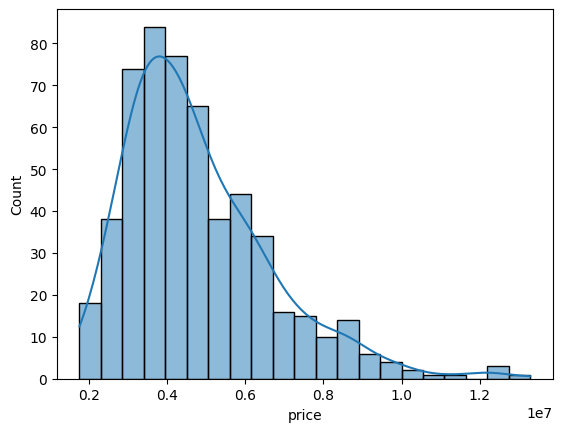

In [5]:
sns.histplot(house['price'],kde=True)
plt.show()

In [6]:
house.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
house = pd.get_dummies(house)#encoding categorical variabless


In [8]:
X = house.drop('price',axis = 1)
y = house['price']

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
house_scaler = scaler.fit_transform(X)

In [11]:
X_scaled_house = pd.DataFrame(house_scaler,columns = X.columns)#scaled features back to dataframe to maintain the columns 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled_house,y,test_size=0.2,random_state=42)

In [14]:
house_linear = LinearRegression()
house_linear.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred_linear = house_linear.predict(X_test)
rmse_linear = mean_squared_error(y_test,y_pred_linear,squared = False)

C:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [16]:
print(f'RMSE: {rmse_linear}')

RMSE: 1324506.9600914405


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [18]:
rf_house = RandomForestRegressor()
rf_house.fit(X_train,y_train)

RandomForestRegressor()

In [19]:
y_pred_rf = rf_house.predict(X_test)
rmse_rf = mean_squared_error(y_test,y_pred_rf,squared = False)

C:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [20]:
print(f'RainFOrestRegessor: {rmse_rf}')

RainFOrestRegessor: 1395372.996958869


In [21]:
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

In [22]:
y_pred_best_rf = best_rf.predict(X_test)
rmse_best_rf = mean_squared_error(y_test, y_pred_best_rf, squared=False)

C:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [23]:
print(f'Best Random Forest RMSE: {rmse_best_rf}')

Best Random Forest RMSE: 1388390.809168546


In [24]:
import pickle

In [25]:
pickle.dump(house,open('HousePrice','wb'))

In [26]:
price = pickle.load(open('HousePrice','rb'))

AttributeError: 'DataFrame' object has no attribute 'predict'